<a href="https://colab.research.google.com/github/jacobwallenberg/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module1/LS_DS_121_Statistics_Probability_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 1 Sprint 2 Assignment 1*

# Apply the t-test to real data

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
df = pd.DataFrame({'a': [1,2,3,4,5], 'b': [2,4,6,8,10]})
df.head()

,a,b
0,1,2
1,2,4
2,3,6
3,4,8
4,5,10


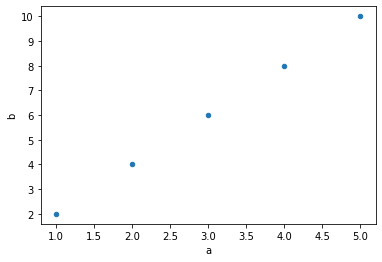

In [4]:
df.plot.scatter('a', 'b');

In [5]:
#dir(np.random) #all the variables to specify! 
coinflips = np.random.binomial(n=1, p=.5, size=100)
coinflips

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1])

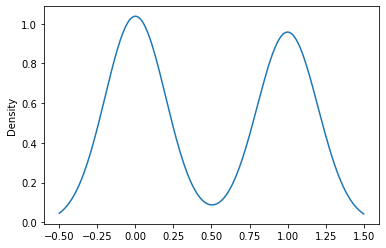

In [6]:
df = pd.DataFrame({'coinflips': coinflips})
df.head()
df['coinflips'].plot.density()

## Practice 1-Sample T-tests

One Sample t-tests determine whether or not a sample mean is statistically different from some known (or hypothesized) population mean. 

### 1) Load the Data
- Use the [automobile dataset](https://archive.ics.uci.edu/ml/datasets/Automobile)
- Fix the column headers
- Make sure NaNs are used to indicate missing values

Feel free to add code cells and text cells as needed throughout the assignment.

In [7]:
### YOUR WORK HERE
# fixed column headers
columns = ['symboling','normalized-losses','make','fuel-type','aspiration','num-of-doors','body-style',
           'drive-wheels','engine-location','wheel-base','length','width','height','curb-weight','engine-type',
           'num-of-cylinders','engine-size','fuel-system','bore','stroke','compression-ratio','horsepower', 'peak-rpm','city-mpg','highway-mpg','price']

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data', names=columns)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [8]:
# replace ?s with NaN
df.isin(['?']).sum()
df = df.replace({ "?": np.NaN})

### 2) Pretend that this dataset represents the cars at a used car lot in your local town. 

- Use df.sample() to pick a random sample of 10 cars. Note that because this sample is random we are going to set the `random_state` so that all of us in the class get the same random sample. Please set your random state to `30` when using `df.sample()`

Is your sample reflective of the population value in regards to highway-mpg? Find the mean for `highway-mpg` for the entire dataset and use a 1-sample t-test to compare your estaimated sample mean to the population mean. Can you say that they are different? 

In [9]:
### YOUR WORK HERE

sample = df.sample(10, random_state=30)

In [10]:
sample['highway-mpg'].mean()
stats.ttest_1samp(sample['highway-mpg'], df['highway-mpg'].mean())

Ttest_1sampResult(statistic=0.8912422391619923, pvalue=0.39600040771093326)

The T-stat is 0.89, suggesting that there is not a huge difference between my sample and the population. 

The p-value of 0.39 means that there is a 39% chance that the null hypotehsis is true. The null hypothesis is that the mean of my sample is equal to the mean of the population. So, there is a significant chance the null hypothesis is true and I **fail to reject** the null hypothesis. 

The salesman says the cars he sells typically have a fuel efficiency of about 35 miles per gallon on the highway. You want to verify his claim but can only test 10 cars. Using your sample of 10, test his claim and report your results.

In [11]:
### YOUR WORK HERE
stats.ttest_1samp(sample['highway-mpg'], 35)

Ttest_1sampResult(statistic=-0.9570244044334747, pvalue=0.36355472283248624)

Null hypothesis = the average fuel efficiency of my sample is 35 (the avg. provided by the salesman). 

P-value is 0.36, which means I **fail to reject the null hypothesis.** The salesman wins. 

Imagine that you now have the capacity to test 100 cars on the lot. Using the same random state of `30`, take a sample of 100 cars. Run a t-test to verify the salesman's claim with your new larger sample. Do you reach the same conclusion as you did with the sample size of 10? 

In [12]:
### YOUR WORK HERE
sample_100 = df.sample(100, random_state=30)

In [13]:
stats.ttest_1samp(sample_100['highway-mpg'], df['highway-mpg'].mean())

Ttest_1sampResult(statistic=-0.16628144196110028, pvalue=0.8682745977159305)

In [14]:
stats.ttest_1samp(sample_100['highway-mpg'], 35)

Ttest_1sampResult(statistic=-6.5185242467032305, pvalue=3.003137417468754e-09)

With a sample of 100 one answer changes: 

1. The first test gives the same answer: the mean of my sample is equal to the mean of the population. In fact, we're even more certain of it with the larger sample than we were with the smaller sample. 
2. The second test gives a different answer. The men of my sample is not equal to 35. I know this because the p-value is 0.000000003.

Why might these two t-tests using the same dataset lead to different conclusions about the salesman's claim?

A larger sample gives us a more accurate representation of the population. It therefore becomes easier for us to determine that the difference between our sample and the claim is due to the data, rather than noise. 

## Practice 2-Sample T-tests

Two Sample t-tests determine whether or not two sample means are statistically different from each other. 

This portion of your assignment requires you to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). 


### 1) Load the data

The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

- Read the dataset in from UCI, you'll need to provide a list of column headers
- Encode "yes" votes as 1 and "no" votes as 0. (You can use `df.replace()` to swap out these values)
- Use dataframe filtering to split the dataframe into two new dataframes based on party. Hold all republicans in one dataframe and all democrats in the other. These will be our two different "samples."



In [17]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2020-08-10 19:44:17--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.1s    

2020-08-10 19:44:18 (130 KB/s) - ‘house-votes-84.data’ saved [18171/18171]



In [18]:
### YOUR WORK HERE
column_headers = ['party','handicapped-infants','water-project',
                  'budget','physician-fee-freeze', 'el-salvador-aid',
                  'religious-groups','anti-satellite-ban',
                  'aid-to-contras','mx-missile','immigration',
                  'synfuels', 'education', 'right-to-sue','crime','duty-free',
                  'south-africa']

df = pd.read_csv('house-votes-84.data', names=column_headers)

In [22]:
df = df.replace({'y':1, 'n':0,'?':np.NaN})

In [36]:
republican = df[df['party'] == 'republican']
democrat = df[df['party'] == 'democrat']
democrat.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0
5,democrat,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
6,democrat,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,1.0,1.0,1.0


### 2) Perform two sample T-tests on different issues and report the results.

- Find an issue that democrats support more than republicans with p < 0.01 (significant at the 99% level).
- Find an issue that republicans support more than democrats with p < 0.01 (significant at the 99% level).
- Find an issue where the difference between republicans and democrats has p > 0.1 (Not significant at the 90% level - i.e. there may not be much of a difference the two sample means)

Please for each test that you run state your null and alternative hypothesis and then write a conclusion reflecting on the null and alternative hypothesis.

Remember, that two-sample t-tests will only tell us if the two groups are *different* from one another. We'll have to look at their sample means directly or use the sign on the t-statistic to know which of the two sample means is larger. 

In [42]:
### YOUR WORK HERE
# did a loop to generate all of them quickly
for i in (df.columns.tolist()):
  if i == 'party':
    None
  else:
    column = i
    print(i)
    print(stats.ttest_ind(republican[i], democrat[i], nan_policy='omit'))

# handicapped-infants skews.... one way. and physician-fee-freeze skews the other way

handicapped-infants
Ttest_indResult(statistic=-9.205264294809222, pvalue=1.613440327937243e-18)
water-project
Ttest_indResult(statistic=0.08896538137868286, pvalue=0.9291556823993485)
budget
Ttest_indResult(statistic=-23.21277691701378, pvalue=2.0703402795404463e-77)
physician-fee-freeze
Ttest_indResult(statistic=49.36708157301406, pvalue=1.994262314074344e-177)
el-salvador-aid
Ttest_indResult(statistic=21.13669261173219, pvalue=5.600520111729011e-68)
religious-groups
Ttest_indResult(statistic=9.737575825219457, pvalue=2.3936722520597287e-20)
anti-satellite-ban
Ttest_indResult(statistic=-12.526187929077842, pvalue=8.521033017443867e-31)
aid-to-contras
Ttest_indResult(statistic=-18.052093200819733, pvalue=2.82471841372357e-54)
mx-missile
Ttest_indResult(statistic=-16.437503268542994, pvalue=5.03079265310811e-47)
immigration
Ttest_indResult(statistic=1.7359117329695164, pvalue=0.08330248490425066)
synfuels
Ttest_indResult(statistic=-8.293603989407588, pvalue=1.5759322301054064e-15)
educa

In [45]:
# the t-stat is negative, which means the right-hand sample mean is higher
# that means that more democrats were in favor of the handicapped-infants bill than republicans
# the certaintity is infinitisemally small at 1.6e-18
stats.ttest_ind(republican['handicapped-infants'], democrat['handicapped-infants'], nan_policy='omit')

Ttest_indResult(statistic=-9.205264294809222, pvalue=1.613440327937243e-18)

In [46]:
# the stat is positive --> left-hand sand sample is higher 
# more republicans favored the physician-fee-freeze than democrats. 
# it is basically a sure thing at 1.99e-177 (!!) p-value
stats.ttest_ind(republican['physician-fee-freeze'], democrat['physician-fee-freeze'], nan_policy='omit')

Ttest_indResult(statistic=49.36708157301406, pvalue=1.994262314074344e-177)

## Stretch Goals:

### 1) Use functions and some iterator (for loop, .apply(), list comprehension, etc.) to perform two sample t-tests on every issue in the dataset in an automated fashion.

In [ ]:
### YOUR WORK HERE
# I did a for loop above :) 



### 2) Work on Performing a T-test without using Scipy in order to get "under the hood" and learn more thoroughly about this topic.
### Start with a 1-sample t-test
 - Establish the conditions for your test 
 - [Calculate the T Statistic](https://blog.minitab.com/hs-fs/hubfs/Imported_Blog_Media/701f9c0efa98a38fb397f3c3ec459b66.png?width=247&height=172&name=701f9c0efa98a38fb397f3c3ec459b66.png) (You'll need to omit NaN values from your sample).
 - Translate that t-statistic into a P-value. You can use a [table](https://www.google.com/search?q=t+statistic+table) or the [University of Iowa Applet](https://homepage.divms.uiowa.edu/~mbognar/applets/t.html)

### Be sure to check your work using Scipy!





In [85]:
### YOUR WORK HERE
# null hypothesis: republicans are equally likely to vote for or against the el-salvador-aid bill

# make sure to exclude the nulls which I definitely realized on my first not second pass
sample_1 = republican[republican['el-salvador-aid'].notnull()]['el-salvador-aid']
sample_mean_1 = sample.mean()
sample_sd_1 = sample.std()
hypothesized_population_mean_1 = 0.5

t_value_1_sample = (sample_mean - hypothesized_population_mean) / (sample_sd / (len(sample)**(1/2)) )
t_value_1_sample
# a t-value of 26.9 for a test with one population gives a p-value less than 0.0005

26.920515819250642

### 3) Then try a 2-sample t-test
 - Establish the conditions for your test 
 - [Calculate the T Statistic](https://lh3.googleusercontent.com/proxy/rJJ5ZOL9ZDvKOOeBihXoZDgfk7uv1YsRzSQ1Tc10RX-r2HrRpRLVqlE9CWX23csYQXcTniFwlBg3H-qR8MKJPBGnjwndqlhDX3JxoDE5Yg) (You'll need to omit NaN values from your sample).
 - Translate that t-statistic into a P-value. You can use a [table](https://www.google.com/search?q=t+statistic+table) or the [University of Iowa Applet](https://homepage.divms.uiowa.edu/~mbognar/applets/t.html)

 ### Be sure to check your work using Scipy!

In [88]:
### YOUR WORK HERE
# null hypothesis: democrats and republicans are equally likely to vote for the 
rep_sample_2 = republican[republican['el-salvador-aid'].notnull()]['el-salvador-aid']
dem_sample_2 = democrat[democrat['el-salvador-aid'].notnull()]['el-salvador-aid']

#d = (x bar 1 - x bar 2) / root of (s^2 1 / n1 + s^2 2 / n2)
#x bar = sample mean, s^2 = sample variance, n = n

rep_mean = rep_sample_2.mean()
dem_mean = dem_sample_2.mean()
rep_variance = rep_sample_2.var()
dem_variance = dem_sample_2.var()
rep_n = len(rep_sample_2)
dem_n = len(dem_sample_2)

t_stat_2 = (rep_mean - dem_mean) / (rep_variance**2/rep_n + dem_variance**2/dem_n)**(1/2)
t_stat_2

# the t-stat is 65 which means that even at infinite degrees of freedom the p-value is <0.001


65.50972025279334